In [35]:
import numpy as np
import skimage as ski
from DAB_Analysis_Functions import DAB
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
DAB_A = DAB()

In [36]:
img = ski.io.imread('Example_Image_2.tif')

In [37]:
lab_Image = ski.color.rgb2lab(DAB_A.im2double(img))

In [38]:
init_asyn_guess = DAB_A.get_guess(img, lab_Image)

In [39]:
init_nuclear_guess = DAB_A.get_guess(img, lab_Image, "select area that is just nuclear staining; press enter when complete")

In [40]:
asyn_params = np.hstack([init_asyn_guess, 15])
cell_params = np.hstack([init_nuclear_guess, 4])

image_mask_asyn, asyn_params = DAB_A.colourFilterLab(lab_Image, asyn_params)
image_mask_asyn = DAB_A.clean_protein_mask(image_mask_asyn)
image_mask_nuclei, nucl_params = DAB_A.colourFilterLab(lab_Image, cell_params, rate=[1,2])
image_mask_nuclei = DAB_A.clean_nuclear_mask(image_mask_nuclei)


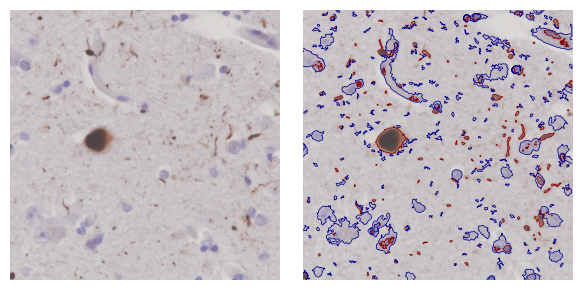

In [41]:
from skimage.color import label2rgb

labeled_img, _ = ndi.label(image_mask_asyn)
image_label_overlay = label2rgb(labeled_img, image=image_mask_asyn, bg_label=0)

fig, axes = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
axes[0].imshow(img)

axes[1].imshow(img)
axes[1].contour(image_mask_asyn, [0.5], linewidths=0.5, colors='darkred')
axes[1].contour(image_mask_nuclei, [0.5], linewidths=0.5, colors='darkblue')

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()